In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy


from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay
from scikitplot.metrics import plot_roc

from collections import defaultdict
from collections import Counter
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, mean_squared_error


In [35]:
#importo il train e test encoded (sto importando quelli GIÀ ONE HOT ENCODED)
df_train = pd.read_csv('df_train_mod2.csv')
df_test = pd.read_csv('df_test_mod2.csv')

In [36]:
#prendo come variabile target frame_count
y_train = df_train['frame_count'].values
y_test = df_test['frame_count'].values

In [37]:
#tolgo frame_count dai dataframe visto che l'ho salvata nella y
df_train.drop(columns=['frame_count'],inplace=True)
df_test.drop(columns=['frame_count'],inplace=True)

In [38]:
df_train

,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_std,lag1_q25,...,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4,vocal_channel,emotional_intensity,statement,repetition,sex,emotion
0,0.145081,0.004001,-0.000031,0.0,0.000000,15.028520,0.904033,0.000000,0.000511,0.000000,...,0.896606,1.0,6.742190,-1.706215,1,0,1,0,1,5
1,0.114319,0.004283,-0.000031,0.0,0.000000,16.488415,1.001578,0.000000,0.000540,0.000000,...,0.874713,1.0,-0.700420,-0.201495,1,0,1,1,1,5
2,0.149963,0.005084,0.000000,0.0,0.000000,17.035218,1.269509,-0.000061,0.000873,0.000000,...,0.899156,1.0,1.688986,-1.024773,1,0,0,0,1,5
3,0.139618,0.004886,-0.000031,0.0,0.000000,21.824521,1.799676,-0.000031,0.000907,0.000000,...,0.886474,1.0,-0.594111,-0.412871,1,0,0,1,1,5
4,0.137665,0.002956,-0.000031,0.0,0.000000,13.236022,0.619367,-0.000031,0.000397,0.000000,...,0.878014,1.0,0.126535,-0.620782,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,-0.154480,0.005399,0.000000,0.0,0.000031,6.504521,-0.437772,0.000000,0.001333,-0.000031,...,0.893268,1.0,0.262900,-1.051814,1,0,0,1,0,7
1798,-0.139679,0.008788,-0.000031,0.0,0.000031,9.706586,-0.079604,0.000000,0.002307,-0.000031,...,0.900089,1.0,-0.857759,-0.608583,1,1,1,0,0,7
1799,-0.210968,0.009933,0.000000,0.0,0.000031,5.874582,-0.026582,0.000000,0.001970,-0.000031,...,0.891486,1.0,-0.656632,-0.586954,1,1,1,1,0,7
1800,-0.085876,0.012221,-0.000031,0.0,0.000092,4.482247,-0.106998,0.000000,0.004435,-0.000031,...,0.869563,1.0,-0.499022,-0.849045,1,1,0,0,0,7


In [8]:

df_train.drop(columns=['vocal_channel','emotional_intensity','statement','repetition','sex','emotion'],inplace=True)
df_test.drop(columns=['vocal_channel','emotional_intensity','statement','repetition','sex','emotion'],inplace=True)

In [39]:
df_train.drop(columns=['emotion'],inplace=True)
df_test.drop(columns=['emotion'],inplace=True)

In [40]:
df_train

,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_std,lag1_q25,...,stft_min_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4,vocal_channel,emotional_intensity,statement,repetition,sex
0,0.145081,0.004001,-0.000031,0.0,0.000000,15.028520,0.904033,0.000000,0.000511,0.000000,...,0.000000,0.896606,1.0,6.742190,-1.706215,1,0,1,0,1
1,0.114319,0.004283,-0.000031,0.0,0.000000,16.488415,1.001578,0.000000,0.000540,0.000000,...,0.270133,0.874713,1.0,-0.700420,-0.201495,1,0,1,1,1
2,0.149963,0.005084,0.000000,0.0,0.000000,17.035218,1.269509,-0.000061,0.000873,0.000000,...,0.000000,0.899156,1.0,1.688986,-1.024773,1,0,0,0,1
3,0.139618,0.004886,-0.000031,0.0,0.000000,21.824521,1.799676,-0.000031,0.000907,0.000000,...,0.205616,0.886474,1.0,-0.594111,-0.412871,1,0,0,1,1
4,0.137665,0.002956,-0.000031,0.0,0.000000,13.236022,0.619367,-0.000031,0.000397,0.000000,...,0.177847,0.878014,1.0,0.126535,-0.620782,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,-0.154480,0.005399,0.000000,0.0,0.000031,6.504521,-0.437772,0.000000,0.001333,-0.000031,...,0.000000,0.893268,1.0,0.262900,-1.051814,1,0,0,1,0
1798,-0.139679,0.008788,-0.000031,0.0,0.000031,9.706586,-0.079604,0.000000,0.002307,-0.000031,...,0.000000,0.900089,1.0,-0.857759,-0.608583,1,1,1,0,0
1799,-0.210968,0.009933,0.000000,0.0,0.000031,5.874582,-0.026582,0.000000,0.001970,-0.000031,...,0.000000,0.891486,1.0,-0.656632,-0.586954,1,1,1,1,0
1800,-0.085876,0.012221,-0.000031,0.0,0.000092,4.482247,-0.106998,0.000000,0.004435,-0.000031,...,0.000000,0.869563,1.0,-0.499022,-0.849045,1,1,0,0,0


In [41]:
#Faccio la normalizzazione con StandardScaler - 
#le cose che ci sono scritte prima sono perchè si fa la normalizzazione solo sulle colonne numeriche, non su quelle categoriche encoded 
#(specialmente visto che sono anche binarie), e queste categoriche sono le ultime 5 colonne dei dataframe

columns_to_scale_train = df_train.iloc[:, :-5]
columns_to_scale_test = df_test.iloc[:, :-5]


# Extract the columns to be kept as they are
columns_to_keep_train = df_train.iloc[:, -5:]
columns_to_keep_test = df_test.iloc[:, -5:]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the columns to be scaled
scaler.fit(columns_to_scale_train) #faccio il fit solo sulle colonne del train!
train_scaled = scaler.transform(columns_to_scale_train)
test_scaled = scaler.transform(columns_to_scale_test)


# Concatenate the scaled columns and the columns to be kept
df_train = pd.concat([pd.DataFrame(train_scaled, columns=columns_to_scale_train.columns), columns_to_keep_train], axis=1)
df_test = pd.concat([pd.DataFrame(test_scaled, columns=columns_to_scale_test.columns), columns_to_keep_test], axis=1)

In [42]:
print(df_train.shape, df_test.shape)

(1802, 236) (624, 236)


In [43]:
df_train

,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_std,lag1_q25,...,stft_min_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4,vocal_channel,emotional_intensity,statement,repetition,sex
0,0.010488,-0.796591,0.616718,-0.0521,-0.794021,0.561426,2.250782,0.033734,-0.813662,0.750242,...,-0.808008,0.717387,0.028095,9.693741,-3.112127,1,0,1,0,1
1,0.007154,-0.782029,0.616718,-0.0521,-0.794021,0.780528,2.469140,0.033734,-0.806354,0.750242,...,2.078271,0.423294,0.028095,-0.181357,0.452190,1,0,1,1,1
2,0.011017,-0.740809,0.636992,-0.0521,-0.794021,0.862592,3.068908,-0.044653,-0.724779,0.750242,...,-0.808008,0.751640,0.028095,2.988985,-1.497956,1,0,0,0,1
3,0.009896,-0.750980,0.616718,-0.0521,-0.794021,1.581374,4.255699,-0.005459,-0.716442,0.750242,...,1.388922,0.581275,0.028095,-0.040302,-0.048507,1,0,0,1,1
4,0.009684,-0.850380,0.616718,-0.0521,-0.794021,0.292407,1.613549,-0.005459,-0.841558,0.750242,...,1.092222,0.467629,0.028095,0.915874,-0.540998,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,-0.021978,-0.724587,0.636992,-0.0521,-0.771778,-0.717861,-0.752879,0.033734,-0.611675,0.621789,...,-0.808008,0.672541,0.028095,1.096808,-1.562009,1,0,0,1,0
1798,-0.020374,-0.550007,0.616718,-0.0521,-0.771778,-0.237293,0.048887,0.033734,-0.372583,0.621789,...,-0.808008,0.764173,0.028095,-0.390119,-0.512104,1,1,1,0,0
1799,-0.028100,-0.491016,0.636992,-0.0521,-0.771778,-0.812402,0.167577,0.033734,-0.455458,0.621789,...,-0.808008,0.648606,0.028095,-0.123257,-0.460870,1,1,1,1,0
1800,-0.014543,-0.373182,0.616718,-0.0521,-0.727293,-1.021365,-0.012435,0.033734,0.149889,0.621789,...,-0.808008,0.354108,0.028095,0.085865,-1.081699,1,1,0,0,0


In [44]:
# Salvo in x_train e x_test i valori 
x_train = df_train.values
x_test = df_test.values

In [11]:
# non eseguire 

# Normalizzo i dati
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the columns to be scaled
scaler.fit(x_train) #faccio il fit solo sulle colonne del train!
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [48]:
# Normalizzo anche la y, visto che è un numero
y_train = scaler.fit_transform(y_train.reshape(-1, 1))
y_test = scaler.transform(y_test.reshape(-1,1))

In [49]:
#questa sarebbe la baseline, cioè facendo semplicemente la media
y_baseline = np.full_like(y_test, np.mean(y_train)) # Calcolo della media della variabile target
mse_baseline = mean_squared_error(y_test, y_baseline)
print("MSE del modello baseline:", mse_baseline)
print('R² del modello baseline:', r2_score(y_test, y_baseline))
print("MAE del modello baseline:", mean_absolute_error(y_test, y_baseline))

MSE del modello baseline: 1.0862302904853953
R² del modello baseline: -0.0637037144482071
MAE del modello baseline: 0.8726644597908672


<h2>SUPPORT VECTOR REGRESSOR</h2>

In [46]:
from sklearn.svm import SVR 

In [50]:
param_grid = {
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'C': [0.01, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1, 10]
}

# cross-validation
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
print("Migliori parametri: ", grid_search.best_params_, grid_search.best_score_) 


#Migliori parametri:  {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'} -0.07331084564202614


/Users/dilettaferri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dilettaferri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dilettaferri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dilettaferri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed w

Migliori parametri:  {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'} -0.07331084564202614


In [51]:
# addestramento del modello usando i parametri della grid search
svr = SVR(kernel='rbf', C=10, epsilon=0.01) 
svr.fit(x_train, y_train)
y_train_pred = svr.predict(x_train)
y_test_pred = svr.predict(x_test)

# valutazione delle performance sul training set
print('Performance sul training set:')
print('R²:', r2_score(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))

# valutazione delle performance sul test set
print('Performance sul test set:')
print('R²:', r2_score(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('MAE', mean_absolute_error(y_test, y_test_pred))

/Users/dilettaferri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performance sul training set:
R²: 0.9999052500948521
MSE: 9.474990514788348e-05
Performance sul test set:
R²: 0.9317714663220023
MSE: 0.06967344284859371
MAE 0.1476644119580631


Performance sul training set:
R²: 0.9999053110372325
MSE: 9.468896276750375e-05
Performance sul test set:
R²: 0.9314985169135545
MSE: 0.06995217264073315
MAE 0.14763043468350504

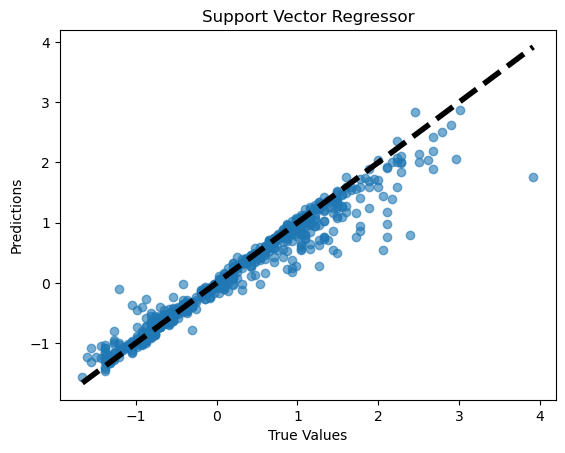

In [52]:
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Support Vector Regressor")
plt.show()

<H2>GRADIENT BOOSTING REGRESSOR</H2>

In [13]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [53]:
param_grid = {
    'n_estimators': [50, 100, 500],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

# cross-validation
grid_search = RandomizedSearchCV(GradientBoostingRegressor(), param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error',random_state=42)
grid_search.fit(x_train, y_train)
print("Migliori parametri: ", grid_search.best_params_, grid_search.best_score_) 

#Migliori parametri:  {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.2} -0.07409827119940049

/Users/dilettaferri/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dilettaferri/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dilettaferri/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dilettaferri/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array w

Migliori parametri:  {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.2} -0.07409827119940049


In [54]:
#alleno il gradient boost regressor con i migliori parametri usciti dalla grid search
gbr = GradientBoostingRegressor(n_estimators=100, 
                                learning_rate=0.2, 
                                max_depth=5, random_state=42)
gbr.fit(x_train, y_train)

y_train_pred = gbr.predict(x_train)
y_test_pred = gbr.predict(x_test)

# valutazione delle performance sul training set
print('Performance sul training set:')
print('R²:', r2_score(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))

# valutazione delle performance sul test set
print('Performance sul test set:')
print('R²:', r2_score(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('MAE', mean_absolute_error(y_test, y_test_pred))

/Users/dilettaferri/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performance sul training set:
R²: 0.9997665861827657
MSE: 0.00023341381723429225
Performance sul test set:
R²: 0.9515504761169082
MSE: 0.04947556324808936
MAE 0.15949558204464617


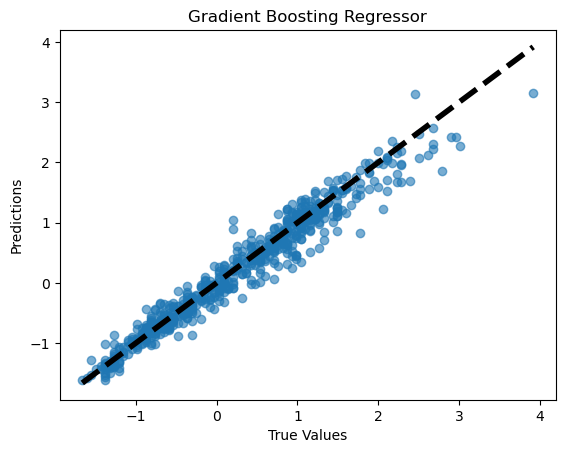

In [55]:
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Gradient Boosting Regressor")
plt.show()

In [56]:
importances = gbr.feature_importances_

# Creare una lista di tuple (feature, importanza)
feature_importance = list(zip(df_train.columns, importances))

# Ordinare le feature per importanza in ordine decrescente
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

# Stampare le feature e le relative importanze
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")

vocal_channel: 0.5742670803069418
q05_w1: 0.08060538305824824
mfcc_sum: 0.05284759449754657
std_w1: 0.050964414063660236
mfcc_kur_w2: 0.034322344932742395
mfcc_skew_w2: 0.032507655651463054
mfcc_sum_w2: 0.013611206602651143
stft_sum: 0.013361150233035681
mfcc_max_w4: 0.012198654455418125
stft_sum_w2: 0.009712842785128146
mfcc_sum_w3: 0.009291320843026038
mfcc_q01_w2: 0.009199333676771908
sc_q25_w4: 0.009099247926923557
stft_sum_w4: 0.006279129576258696
sc_sum_w3: 0.00541564978716162
sc_sum_w2: 0.005137181143820509
stft_mean_w4: 0.0040621723471208964
kur_w1: 0.0036685937842021446
lag1_kur_w1: 0.0034271722621389967
sc_min_w3: 0.002817443878526563
sc_sum: 0.00273094670385214
lag1_min_w1: 0.00266119144009941
stft_sum_w3: 0.002491785592144109
mfcc_sum_w4: 0.0024817659110708628
mfcc_mean: 0.002340772014559165
mfcc_sum_w1: 0.002339432748729124
sc_q50_w4: 0.0023288218755497443
zc_sum: 0.0022479389450456543
mfcc_q05_w3: 0.0017576785123093284
lag1_skew_w1: 0.001732892055763682
sc_q99: 0.00168963

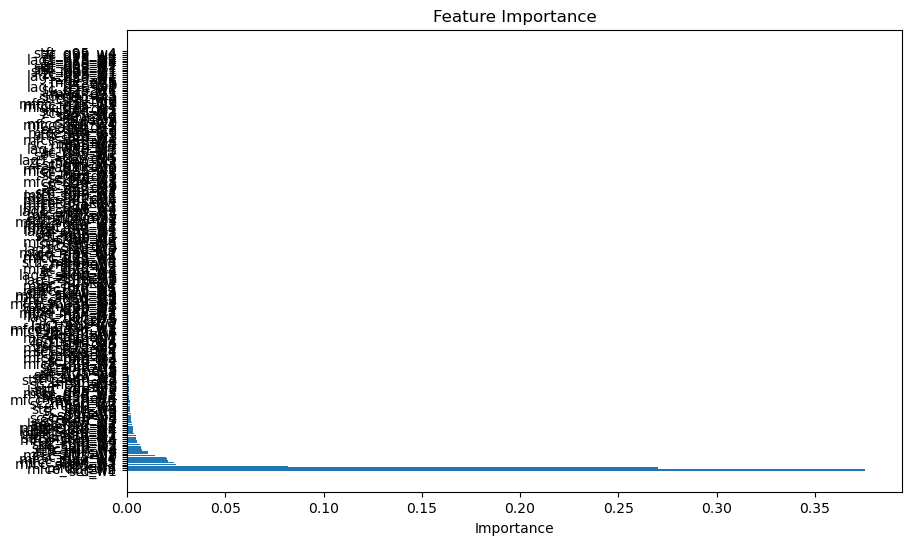

In [29]:

# Usa il codice precedente per ottenere le feature e le importanze
feature_importance = list(zip(df_train.columns, clf.feature_importances_))
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

# Estrai le feature e le importanze
features, importances = zip(*feature_importance)

# Crea un grafico a barre delle importanze delle feature
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

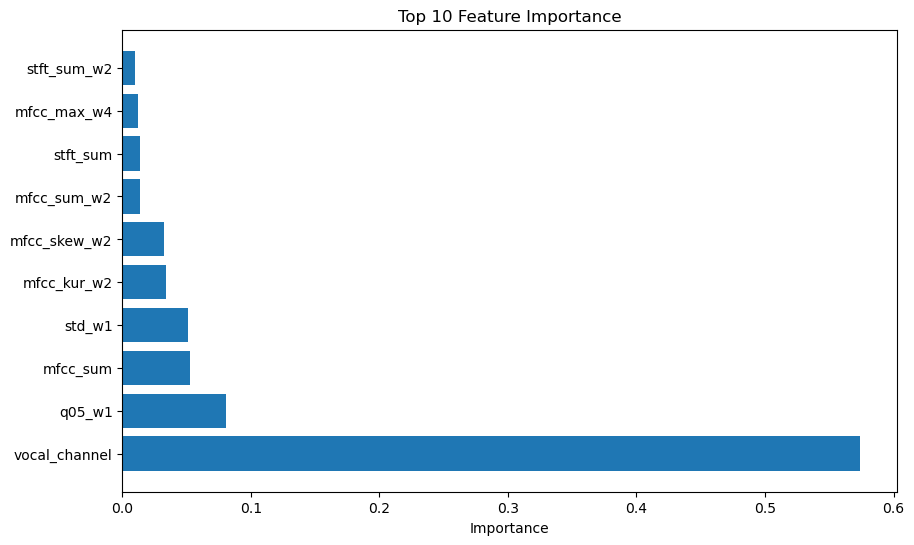

In [57]:
import matplotlib.pyplot as plt

# Usa il codice precedente per ottenere le feature e le importanze
feature_importance = list(zip(df_train.columns, gbr.feature_importances_))
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

# Estrai le prime 10 feature e le importanze
features, importances = zip(*feature_importance[:10])

# Crea un grafico a barre delle importanze delle feature
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance')
plt.show()